In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '0.99',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 1,
})
palette = sns.color_palette("Set2", 10)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

def plot_neuron(name):
    data = pd.read_csv('./tests/results/%s.csv' % name, index_col=0)
    data[["I", "V", "u"]].plot(style=["-", "-", "--"], title=name)

    spikes = data["spike"]
    spikes = spikes[spikes != 0]
    spikes.plot(style=["."])

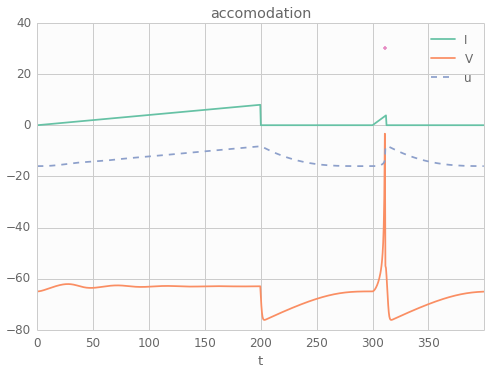

In [222]:
plot_neuron("accomodation")

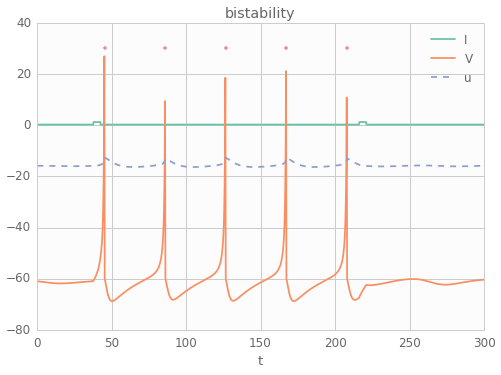

In [223]:
plot_neuron("bistability")

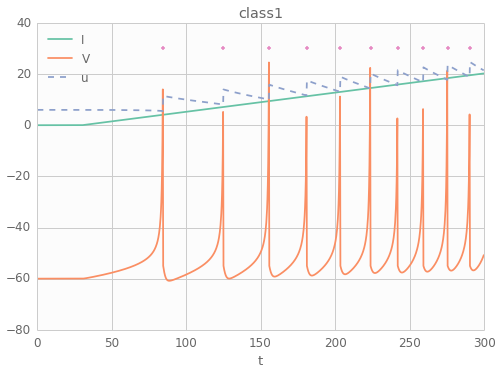

In [78]:
plot_neuron("class1")

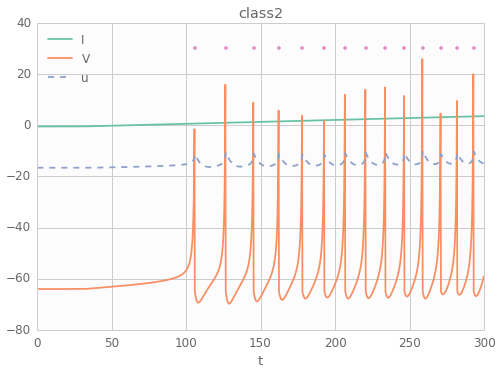

In [79]:
plot_neuron("class2")

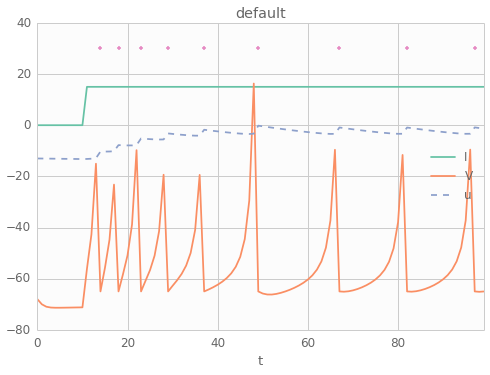

In [80]:
plot_neuron("default")

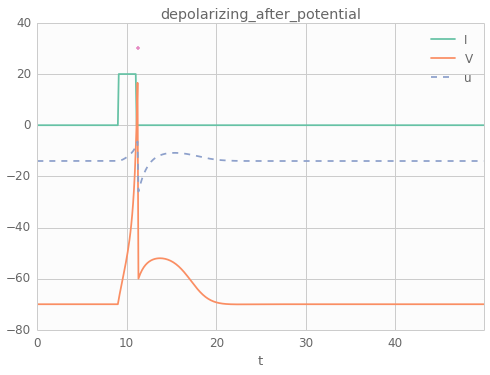

In [81]:
plot_neuron("depolarizing_after_potential")

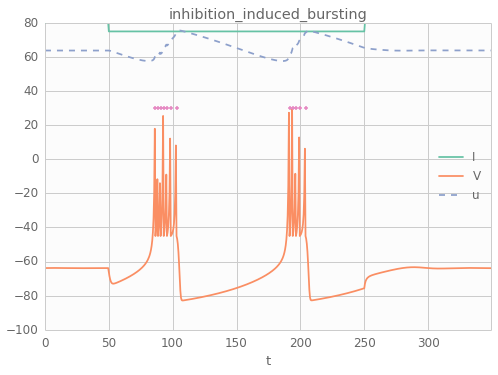

In [82]:
plot_neuron("inhibition_induced_bursting")

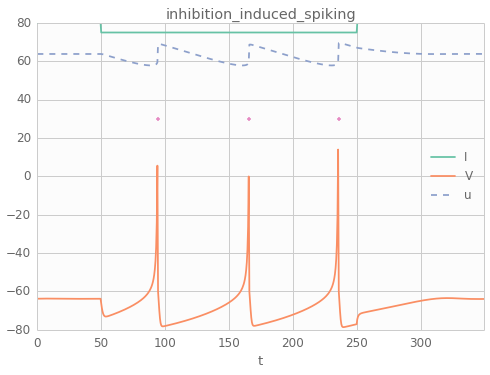

In [83]:
plot_neuron("inhibition_induced_spiking")

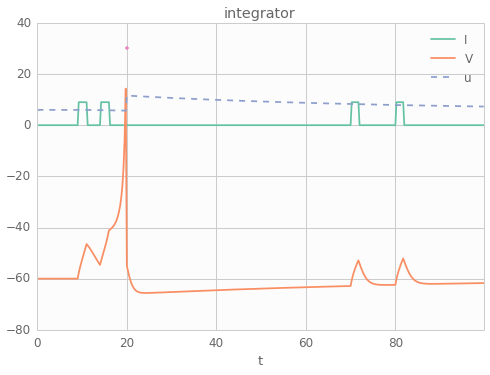

In [84]:
plot_neuron("integrator")

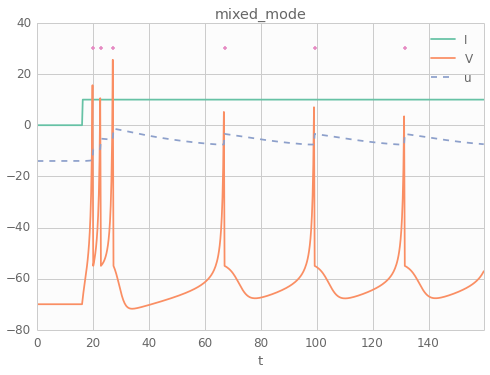

In [85]:
plot_neuron("mixed_mode")

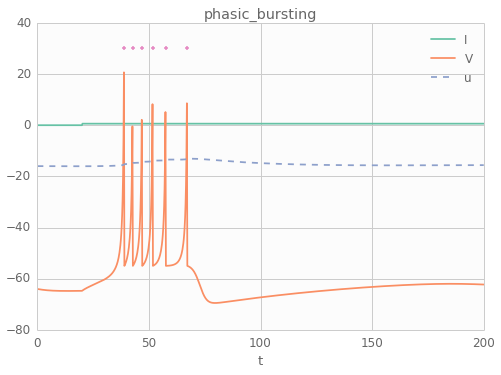

In [86]:
plot_neuron("phasic_bursting")

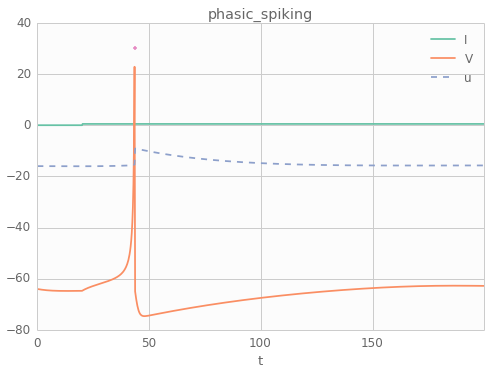

In [87]:
plot_neuron("phasic_spiking")

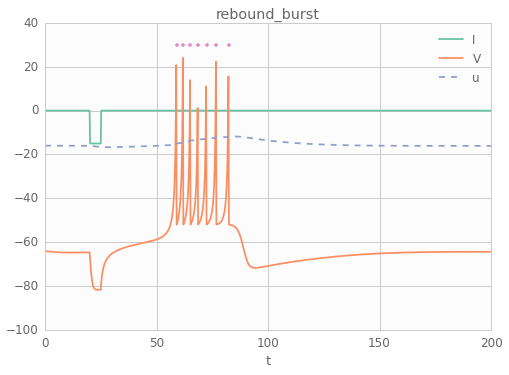

In [88]:
plot_neuron("rebound_burst")

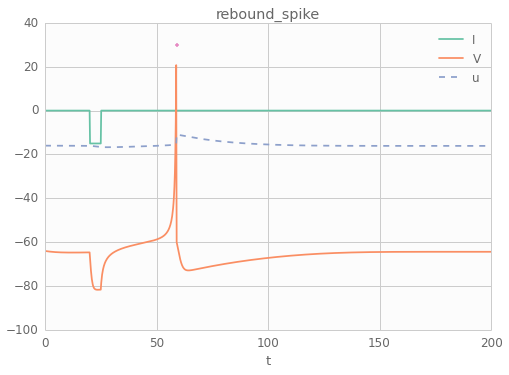

In [89]:
plot_neuron("rebound_spike")

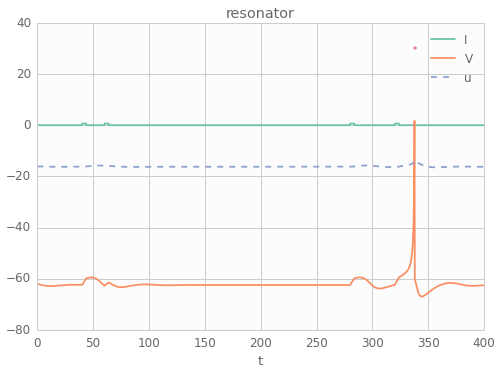

In [90]:
plot_neuron("resonator")

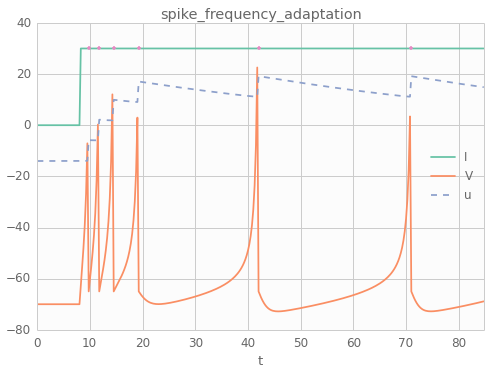

In [91]:
plot_neuron("spike_frequency_adaptation")

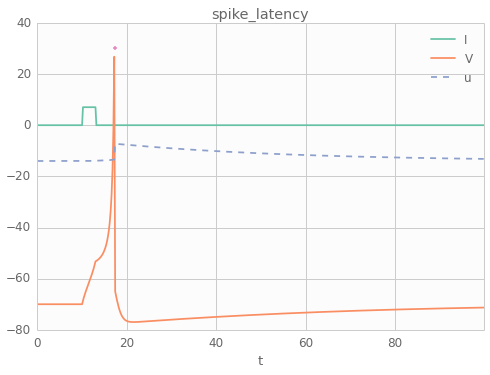

In [92]:
plot_neuron("spike_latency")

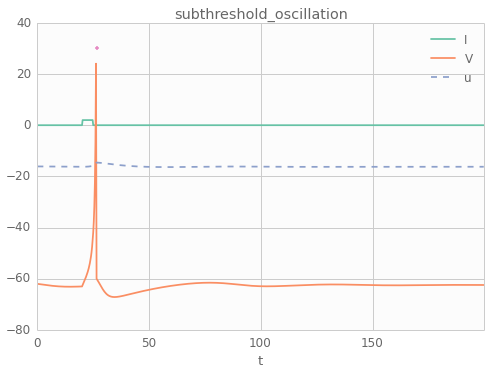

In [93]:
plot_neuron("subthreshold_oscillation")

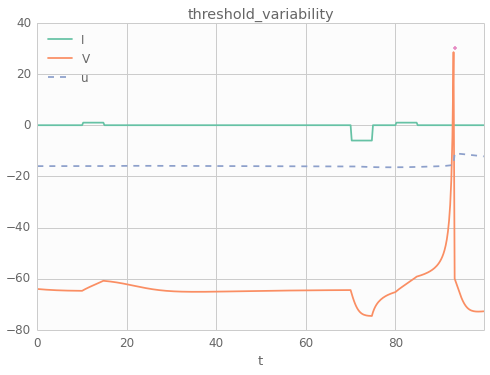

In [94]:
plot_neuron("threshold_variability")

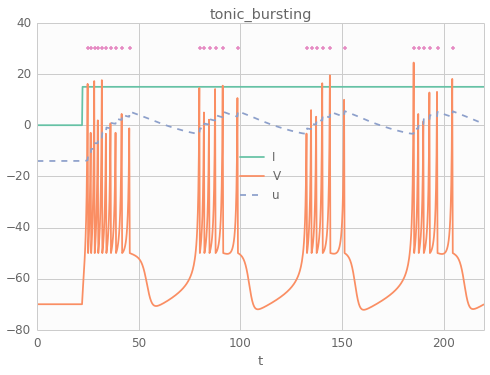

In [95]:
plot_neuron("tonic_bursting")

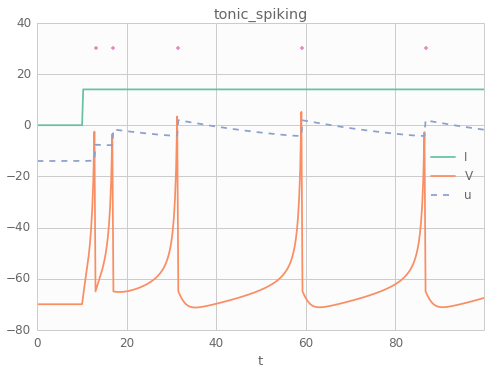

In [96]:
plot_neuron("tonic_spiking")

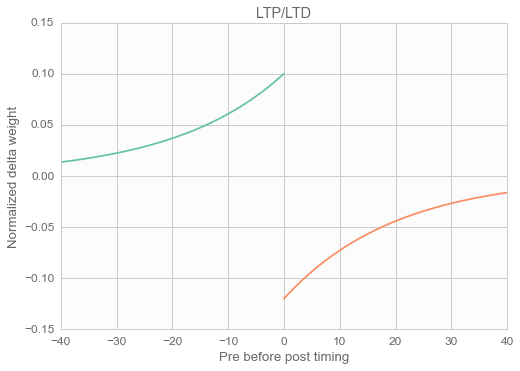

In [4]:
ltp = pd.read_csv('./tests/results/stdp_ltp.csv')
ltd = pd.read_csv('./tests/results/stdp_ltd.csv')

plt.plot(ltp["t"], ltp["d"])
plt.plot(ltd["t"], ltd["d"])

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("LTP/LTD")

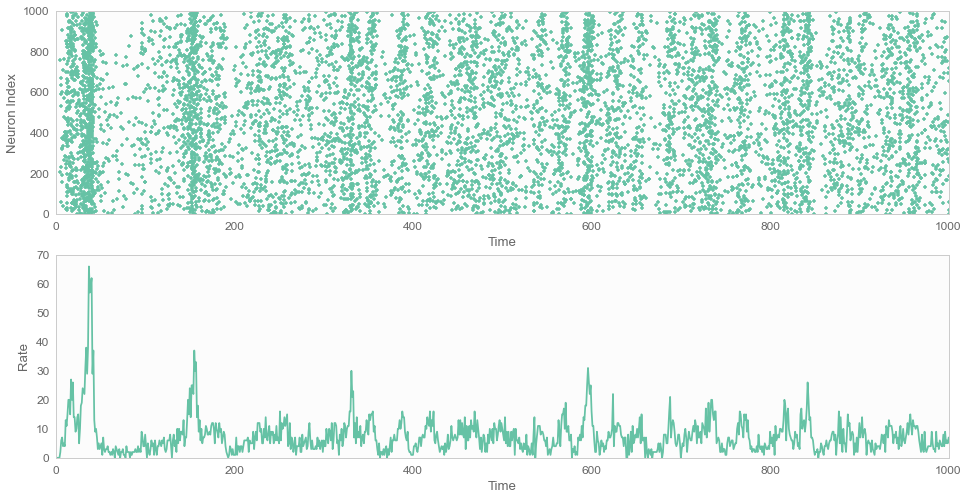

In [40]:
spikes = pd.read_csv('./examples/results/spikes.csv')
rates = pd.read_csv('./examples/results/spikes_rate.csv')

plt.figure(figsize=(16,8))
plt.title("Spiking Network")

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(spikes["t"], spikes["i"], ".")
ax1.set_xlabel("Time")
ax1.set_ylabel("Neuron Index")

ax2.plot(rates["t"], rates["rate"])
ax2.set_xlabel("Time")
ax2.set_ylabel("Rate")

In [33]:
palette = sns.color_palette("Set1", 10)

def plot_window(spikes, rates, t_offset, t_window):
    spikes = spikes[(spikes['t'] > t_offset) & (spikes['t'] < t_offset + t_window)]
    rates = rates[(rates['t'] > t_offset) & (rates['t'] < t_offset + t_window)]

    plt.figure(figsize=(16,8))
    plt.title("STDP Network")

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    exc_spikes = spikes[spikes["i"] < 800]
    inh_spikes = spikes[spikes["i"] >= 800]
    ax1.plot(exc_spikes["t"], exc_spikes["i"], ",")
    ax1.plot(inh_spikes["t"], inh_spikes["i"], ",")
    ax1.set_title(t_offset)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Neuron Index")

    ax2.plot(rates["t"], rates["rate"])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Rate")

ERROR! Session/line number was not unique in database. History logging moved to new session 70


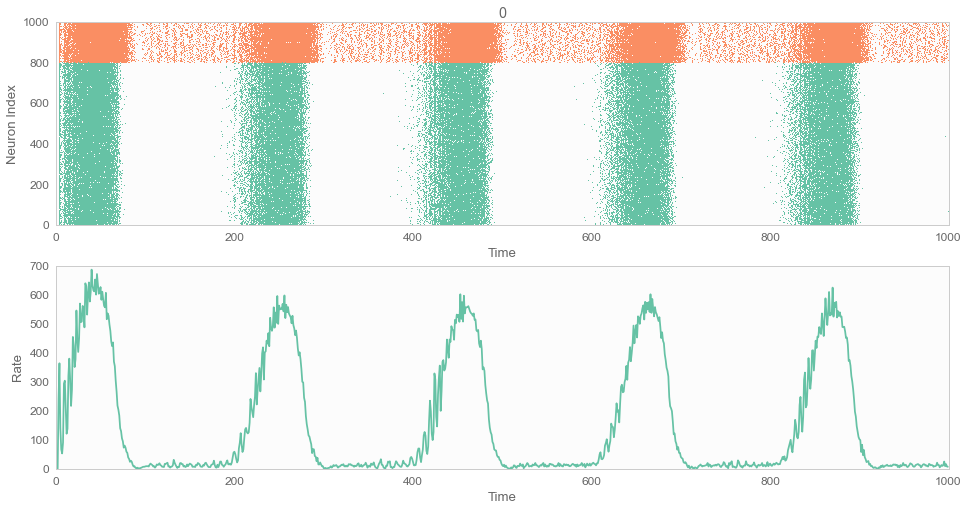

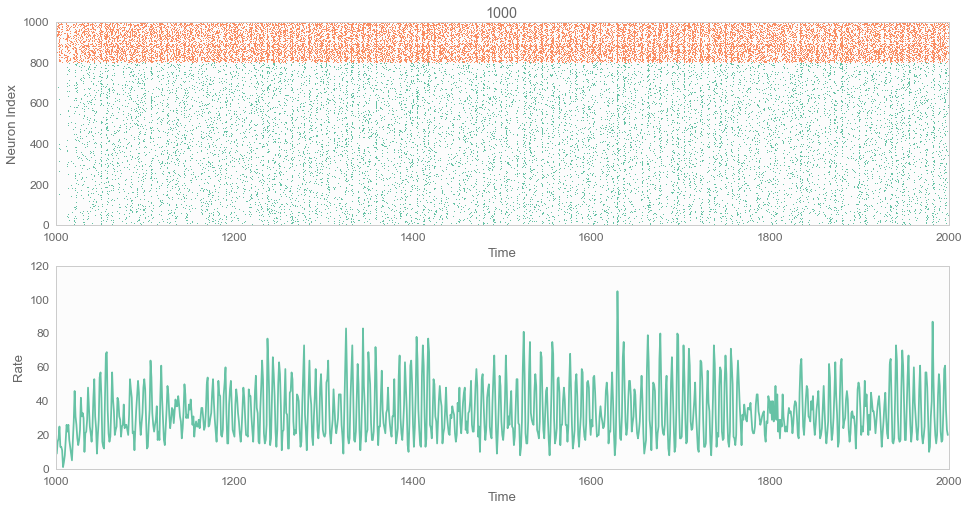

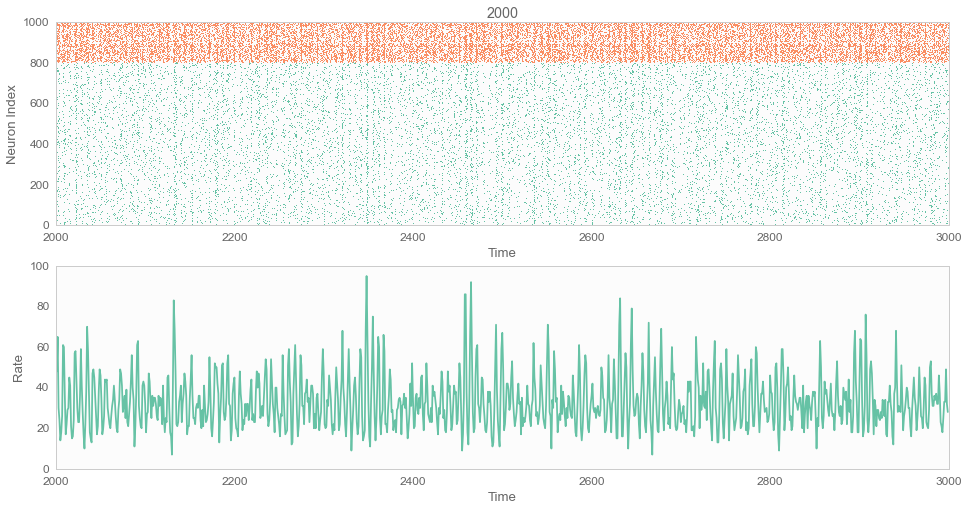

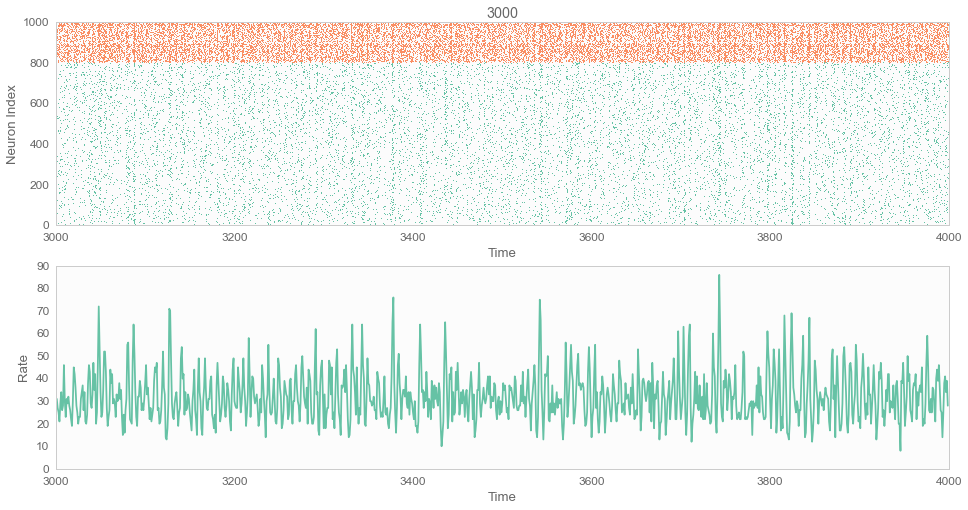

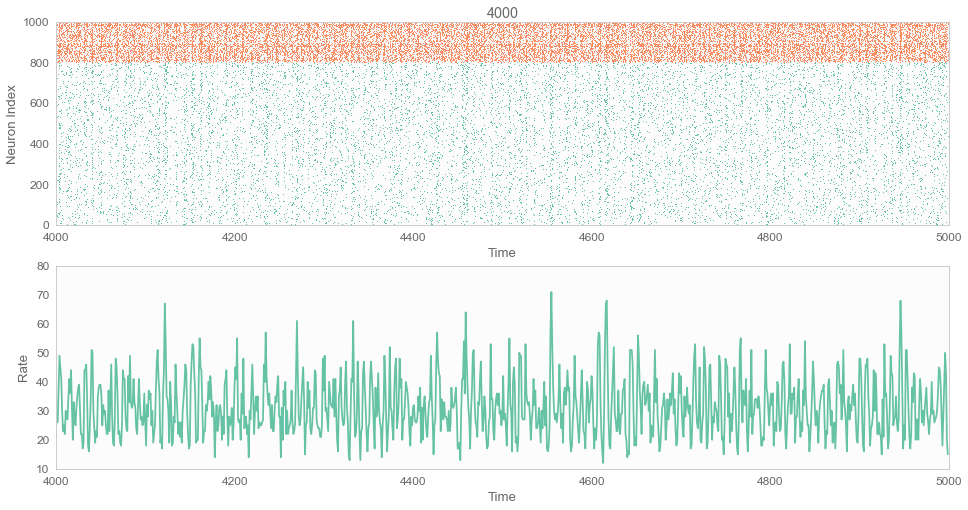

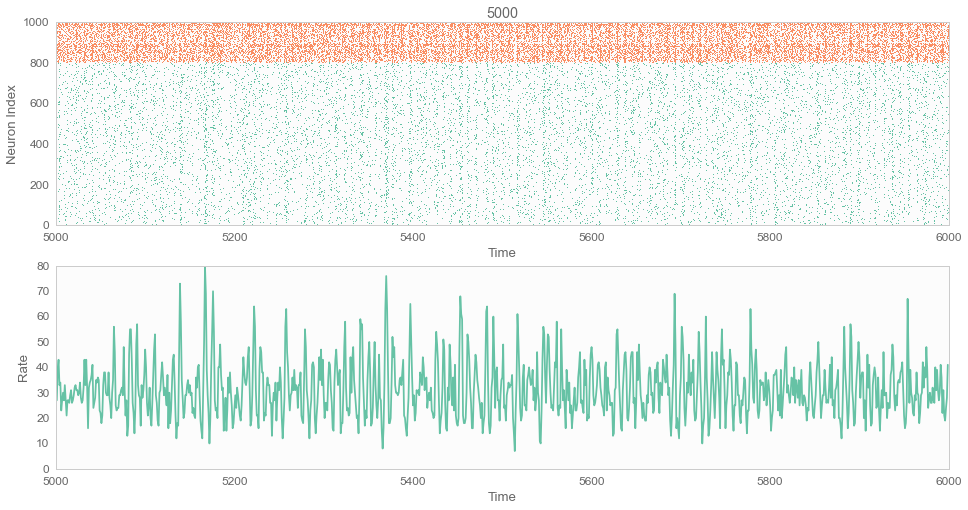

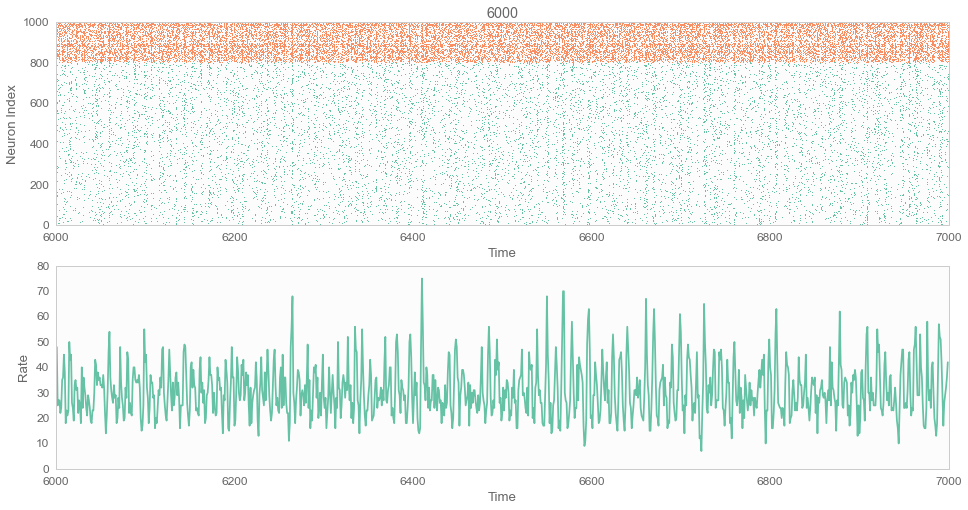

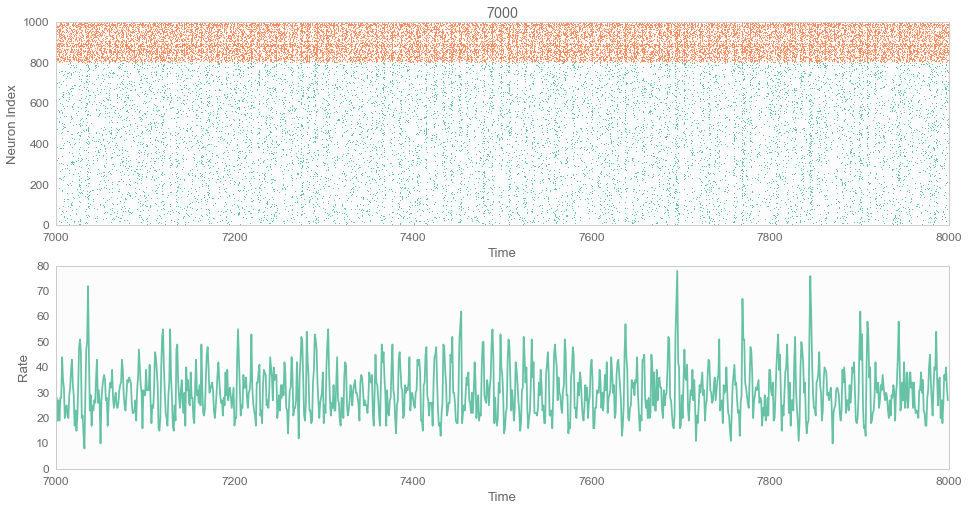

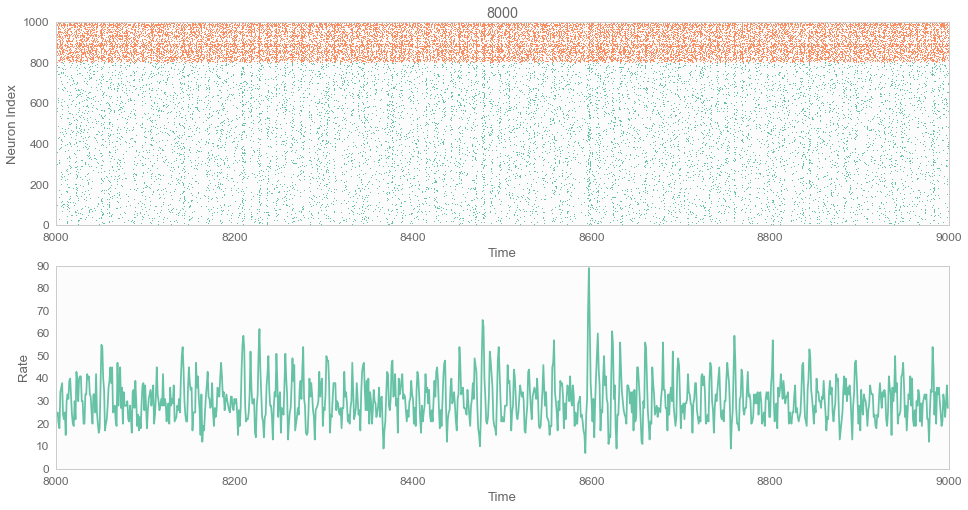

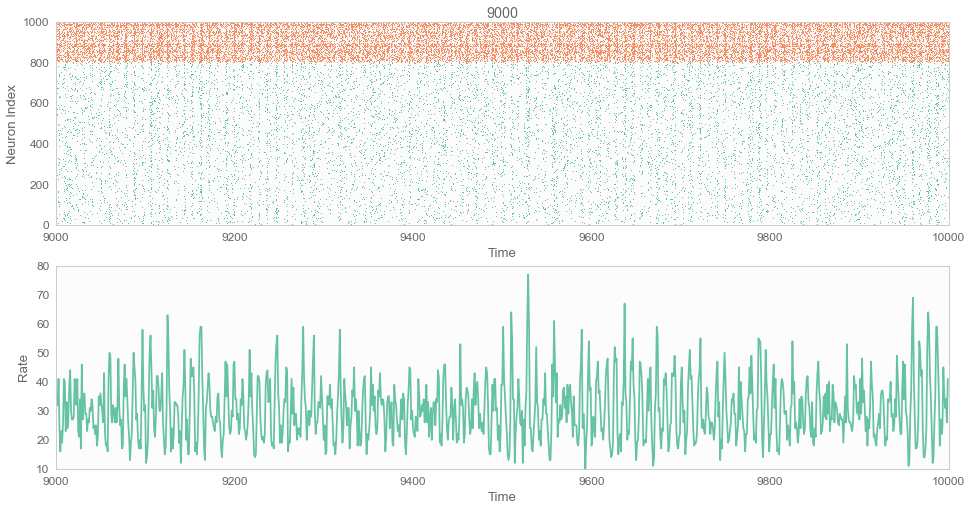

In [51]:
spikes = pd.read_csv('./examples/results/stdp.csv')
rates = pd.read_csv('./examples/results/stdp_rate.csv')

window_limit = 10000
window_size = 1000

window_offset = 0
while True:
    plot_window(spikes, rates, window_offset, window_size)
    window_offset += window_size
    if window_offset >= window_limit:
        break